Autor: Juan Carlos López Jerez

# Ejercicio 1

La siguiente tabla contiene, en un editable Excel, dos variables: la primera es dicotómica con valores 1 (predinástico temprano) y 2 (predinástico tardío) y la segunda contiene la anchura de cráneos (mm.) encontrados en un yacimiento arqueológico. La idea es analizar si existen diferencias en la longitud de la anchura de los cráneos egipcios a medida que pasa el tiempo. Creo que mayoritariamente tenemos una idea de que las cabezas egipcias son más alargadas y cuando ya llegamos a los romanos son más redondeadas. El cine se ha encargado de hacer muy gráfico todo esto.

Se pide:

a)	obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. Así mismo, obtener el diagrama de caja y bigotes. Se debe hacer por separado para la sub-muestra de los cráneos del predinástico temprano y para la sub-muestra de los del predinástico tardío. Comentar los resultados obtenidos. Estos comentarios son obligatorios.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator



# Cargar datos desde un archivo Excel
datos = pd.read_excel("datosejercicioevaluacionanchuras.xlsx")

# Función para obtener las medidas estadísticas
def medidas_estadisticas(data):
    return {
        "count": data.count(),
        "mean": data.mean(),
        "std": data.std(),
        "min": data.min(),
        "25%": data.quantile(0.25),
        "50%": data.median(),
        "75%": data.quantile(0.75),
        "max": data.max(),
        "moda": data.mode()[0], 
        "rango": data.max() - data.min(),
        "varianza": data.var(),
        "Coeficiente de variación de Pearson": data.std()/data.mean(),
        "Coeficiente de asimetría de Fisher": stats.skew(data),
        "Coeficiente de Curtosis": stats.kurtosis(data)
    }

# Agrupar por época histórica y aplicar las medidas estadísticas
resultados = datos.groupby('Época histórica')['Anchura del cráneo'].apply(medidas_estadisticas)

resultados_df = resultados.unstack(level=0).reset_index()

# Renombrar las columnas para mayor claridad
resultados_df.columns = ['Medida', 'Predinástico Temprano', 'Predinástico Tardío']
resultados_df

,Medida,Predinástico Temprano,Predinástico Tardío
0,count,30.000000,30.000000
1,mean,131.533333,132.466667
2,std,0.819307,1.008014
3,min,130.000000,131.000000
4,25%,131.000000,132.000000
5,50%,131.500000,133.000000
6,75%,132.000000,133.000000
7,max,134.000000,135.000000
8,moda,131.000000,133.000000
9,rango,4.000000,4.000000


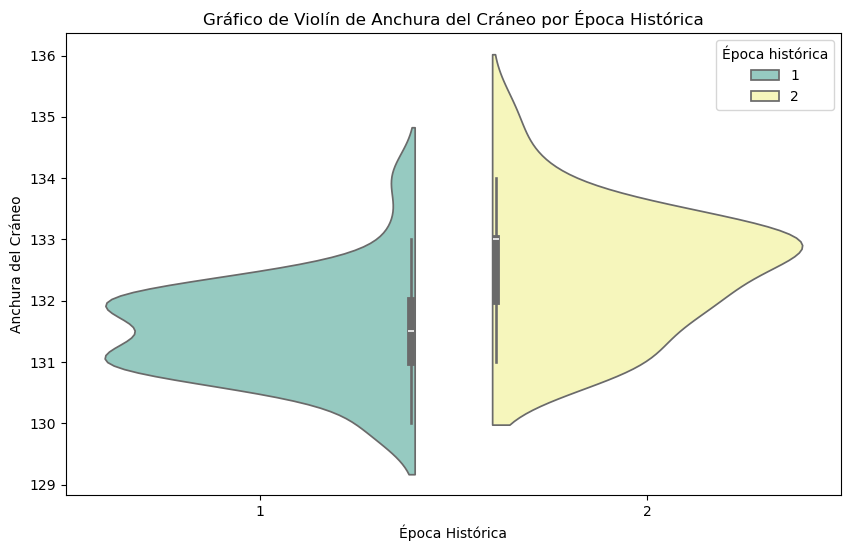

In [2]:
plt.figure(figsize=(10, 6))
# Graficar el violinplot para comparar las dos épocas
sns.violinplot(x='Época histórica', y='Anchura del cráneo', data=datos, hue='Época histórica', palette="Set3", split=True)

# Agregar título y etiquetas
plt.title('Gráfico de Violín de Anchura del Cráneo por Época Histórica')
plt.xlabel('Época Histórica')
plt.ylabel('Anchura del Cráneo')

# Mostrar el gráfico
plt.show()

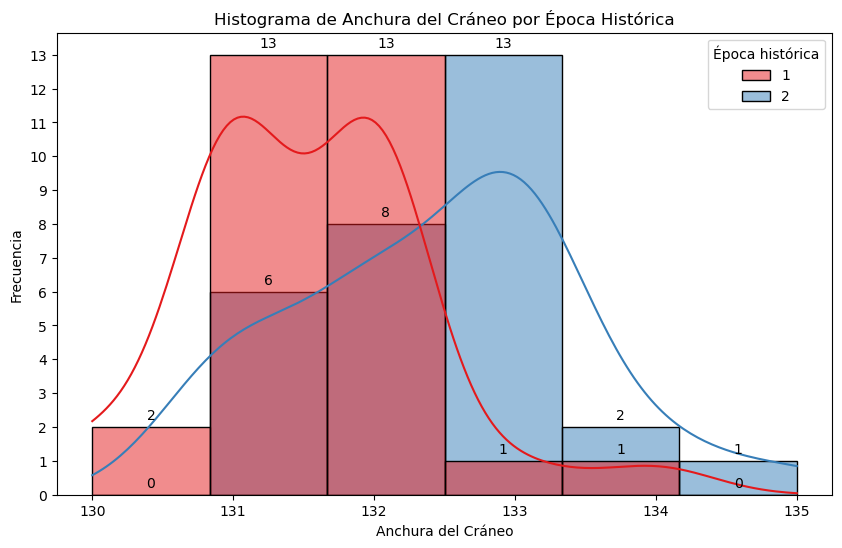

In [3]:
# Crear el gráfico de histograma
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=datos, x='Anchura del cráneo', hue='Época histórica', kde=True, palette='Set1', bins=6, multiple='layer')

# Agregar los números a las barras del histograma usando bar_label
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)

# Ajustar el intervalo del eje Y a 1 unidad
ax.yaxis.set_major_locator(MultipleLocator(1)) 

# Agregar título y etiquetas
plt.title('Histograma de Anchura del Cráneo por Época Histórica')
plt.xlabel('Anchura del Cráneo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

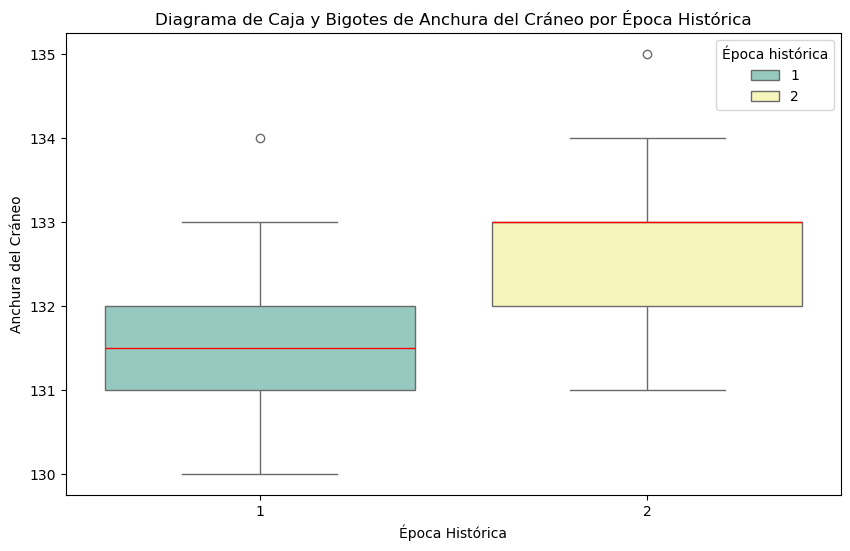

In [4]:
# Crear boxplot para comparar las dos épocas

plt.figure(figsize=(10, 6))
# Graficar el boxplot para Predinástico Temprano y Predinástico Tardío
sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=datos, hue='Época histórica', palette="Set3", medianprops=dict(color='red'))

# Agregar título y etiquetas
plt.title('Diagrama de Caja y Bigotes de Anchura del Cráneo por Época Histórica')
plt.xlabel('Época Histórica')
plt.ylabel('Anchura del Cráneo')

# Mostrar el gráfico
plt.show()

Dadas las medidas calculadas y la información adicional que nos proporciona el diagrama de cajas y bigotes. Podemos mencionar las siguientes características de las distribuciones:

Periodo temprano:

- Podemos observar en el diagrama de cajas que el periodo temprano es más simétrica que el periodo tardío.
- Podemos observar en el diagrama de cajas que hay un valor atípico siendo dicho valor la anchura del cráneo igual a 134 mm.
- Coeficiente de asimetría: 0.656983 estamos ante una distribución asimétrica positiva, existen más valores a la derecha de la media que a su izquierda.
- Coeficiente de Courtosis: 1.304372 estamos ante una distribución leptocúrtica que presenta un elevado grado de concentración alrededor de los valores centrales de la variable (mediana).

Periodo tardío: 

- Podemos observar en el diagrama de cajas que la mediana (Quartil 50) y el quartil 75 son iguales, vemos que ambos valores coinciden en una línea. Podemos deducir que el valor 133 se repite en el 25% de los datos, además dicho valor es la moda.
- Podemos observar en el diagrama de cajas que hay un valor atípico siendo dicho valor la anchura del cráneo igual a 135 mm.
- Coeficiente de asimetría: 0.195106 estamos ante una distribución asimétrica positiva, existen más valores a la derecha de la media que a su izquierda.
- Coeficiente de Courtosis: -0.186237 estamos ante una distribución platicúrtica la cual muestra valores menos concentrados en la mediana a comparación con la distribución normal y datos más concentrados en las colas.


b) Determinar si cada una de las dos sub-muestras sigue una distribución normal utilizando el test de Kolmogorov-Smirnov.

Para el test de Kolmogorov-Smirnov tendremos:

Ho -> la distribución 1-2 sigue una distribución normal.

H1 -> La distribución 1-2 no sigue una distribución normal.

In [5]:
submuestra_1 = datos[datos['Época histórica'] == 1]['Anchura del cráneo']
submuestra_2 = datos[datos['Época histórica'] == 2]['Anchura del cráneo']
stat_1, p_value_1 = stats.kstest(submuestra_1, 'norm', args=(np.mean(submuestra_1), np.std(submuestra_1)))
stat_2, p_value_2 = stats.kstest(submuestra_2, 'norm', args=(np.mean(submuestra_2), np.std(submuestra_2)))

# Imprimir los resultados de la submuestra 1
print(f"Resultados de la submuestra 1:")
print(f"Estadístico: {stat_1}, P-Valor: {p_value_1}")
if p_value_1 > 0.05:
    print("La submuestra 1 sigue una distribución normal")
else:
    print("La submuestra 1 no sigue una distribución normal")

# Imprimir los resultados de la submuestra 2
print(f"\nResultados de la submuestra 2:")
print(f"Estadístico: {stat_2}, P-Valor: {p_value_2}")
if p_value_2 > 0.05:
    print("La submuestra 2 sigue una distribución normal")
else:
    print("La submuestra 2 no sigue una distribución normal")

Resultados de la submuestra 1:
Estadístico: 0.2460415331404474, P-Valor: 0.04379464338101191
La submuestra 1 no sigue una distribución normal

Resultados de la submuestra 2:
Estadístico: 0.23809252465886277, P-Valor: 0.055727049848177
La submuestra 2 sigue una distribución normal


Submuestra 1 - La muestra posee un estadístico de 0.2460415331404474 además la tabla de K-SMR para una muestra de 30 y un alfa de 0.05 el valor critico es de 0.24170 en donde cómo podemos ver el D observado es mayor que el D esperado por lo que se rechaza la H0. Además el p-valor es de  0.04379464338101191 el cual es menor que 0.05. Entonces concluimos: a un nivel de confianza del 95% que existe suficiente evidencia para rechazar la H0, luego la submuestra 1 no sigue una distribución normal.

Submuestra 2 – La muestra posee un estadístico de 0.23809252465886277 y según la tabla K-SMR para una muestra de 30 y un alfa de 0.05 el valor critico es de 0.24170 en donde cómo podemos ver el valor D observado es menor que el D esperado por lo que se acepta la H0. Además el p-valor es de 0.055727049848177 el cual es mayor que 0.05 Entonces concluimos: a un nivel de confianza del 95% no existe suficiente evidencia para rechazar la H0 luego, la submuestra 2 sigue una distribución normal.

# Ejercicio 2

a) Con los mismos datos del ejercicio anterior, obtener un intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la diferencia entre las medias de la anchura de la cabeza en ambos periodos históricos. Interpretar los resultados obtenidos y discutirlos en función del test de normalidad del ejercicio anterior. La interpretación debe ser rigurosa desde el punto de vista estadístico y también marcada por el story telling, es decir, comprensible desde el punto de vista de las variables respondiendo a la pregunta ¿en qué época la cabeza era más ancha?

Para abordar este apartado debemos de tener en cuenta las siguientes condiciones:
- Estamos ante muestras independientes.
- Sabemos que las varianzas poblacionales son desconocidas.
- Falta demostrar que las varianzas poblacionales son iguales o diferentes
  

Vamos a evaluar si podemos asumir que las varianzas de las dos poblaciones son iguales o no, utilizando una prueba de Levene para comparar la homogeneidad de varianzas.

H0: Poseen varianzas poblacionales iguales S1 = S2 

H1: Poseen varianzas poblacionales diferentes S1 != S2


In [6]:
# Prueba de Levene para igualdad de varianzas
stat, p_value = stats.levene(submuestra_1, submuestra_2)

# Interpretar el resultado
if p_value < 0.05:
    print("Rechazamos H0: Las varianzas son significativamente diferentes")
else:
    print("No rechazamos H0: Las varianzas poblacionales son iguales")


No rechazamos H0: Las varianzas poblacionales son iguales


Podemos concluir que a un 95% de confianza, no existe evidencia estadística suficiente como para rechazar la H0. Por lo tanto, se acepta H0 con lo que las varianzas son iguales.

Aunque una de las muestras no sea estrictamente normal, si tenemos un tamaño de muestra suficientemente grande (al menos 30 observaciones por muestra), el Teorema Central del Límite nos dice que la distribución de la media de la muestra será aproximadamente normal. Esto hace que los intervalos de confianza se puedan calcular usando la distribución t de Student para una diferencia de medias con varianzas iguales.

Podemos calcular los intervalos de confianza:

In [7]:
# Calcular medias y desviaciones estándar
mean_1 = np.mean(submuestra_1)
mean_2 = np.mean(submuestra_2)
std_1 = np.std(submuestra_1, ddof=1)
std_2 = np.std(submuestra_2, ddof=1)
n1 = len(submuestra_1)
n2 = len(submuestra_2)

# Calcular la varianza combinada
pooled_variance = (((n1 - 1) * std_1**2) + ((n2 - 1) * std_2**2)) / (n1 + n2 - 2)

# Calcular el error estándar combinado
se_difference = np.sqrt((pooled_variance / n1) + (pooled_variance / n2))

# Grados de libertad
df = n1 + n2 - 2

# Niveles de confianza
confidences = [0.9, 0.95, 0.99]

# Calcular los intervalos de confianza
for conf in confidences:
    alpha = 1 - conf
    t_critical = stats.t.ppf(1 - alpha / 2, df)  # valor t crítico
    margin_of_error = t_critical * se_difference  # margen de error
    lower_bound = (mean_1 - mean_2) - margin_of_error
    upper_bound = (mean_1 - mean_2) + margin_of_error
    print(f"Intervalo de confianza al {conf*100}%: ({lower_bound:.4f}, {upper_bound:.4f})")

Intervalo de confianza al 90.0%: (-1.3298, -0.5369)
Intervalo de confianza al 95.0%: (-1.4081, -0.4586)
Intervalo de confianza al 99.0%: (-1.5650, -0.3017)


En los tres intervalos de confianza (90%, 95%, y 99%), la diferencia de medias es negativa, lo que significa que los cráneos del predinástico temprano son menos anchos que los del predinástico tardío, además ninguno de los intervalos incluye el valor 0, lo que indica que la diferencia entre las dos épocas es estadísticamente significativa. En otras palabras, con un alto nivel de certeza, podemos concluir que las medias de los cráneos de las dos épocas son diferentes.

b) Utilizar el test t para contrastar la hipótesis de que ambas medias son iguales. Explicar qué condiciones se deben cumplir para poder aplicar ese contraste. Determinar si se cumplen. Admitiremos de forma natural la independencia entre ambas muestras, así que esa condición no hace falta comprobarla.

Observación: Quiero insistir en que debéis hacer el test t para la diferencia de medias incluso si las condiciones no se cumplieran. En ese caso discutir la validez de los resultados obtenidos.

Para poder realizar este apartado para poder probar la diferencia de medias de dos poblaciones normales, se debe cumplir lo siguiente:

- Normalidad de los datos (con la prueba de kolmogrov- smirnov se probó que una submuestra sigue una distribución normal y otra no) pero aunque una de las muestras no sea estrictamente normal, si tenemos un tamaño de muestra suficientemente grande (al menos 30 observaciones por muestra), el Teorema Central del Límite nos dice que la distribución de la media de la muestra será aproximadamente normal.

- Homogeneidad de la varianza (se demostró en el ejercicio anterior que las varianzas son homogéneas con prueba F)

- Independencia de las observaciones (el ejercicio nos exige que esta condición ya se cumple)

Planteamos la hipótesis:

H0: Las medias de ambas poblaciones son iguales M0 = M1

H1: Las medias de ambas poblaciones son diferentes M0 != M1

In [8]:
# Realizar el test 
t_stat, p_value = stats.ttest_ind(submuestra_1, submuestra_2, equal_var=True)  # Varianzas iguales

alpha = 0.05
# Calcular el valor crítico t para un test bilateral
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Mostrar los resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor crítico t para alfa={alpha:.4f} (bilateral): {t_critical:.4f}")
print(f"P-valor: {p_value:.4f}")

# Decisión
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las medias son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar que las medias son diferentes.")

Estadístico t: -3.9354
Valor crítico t para alfa=0.0500 (bilateral): 2.0017
P-valor: 0.0002
Rechazamos la hipótesis nula: Las medias son diferentes.


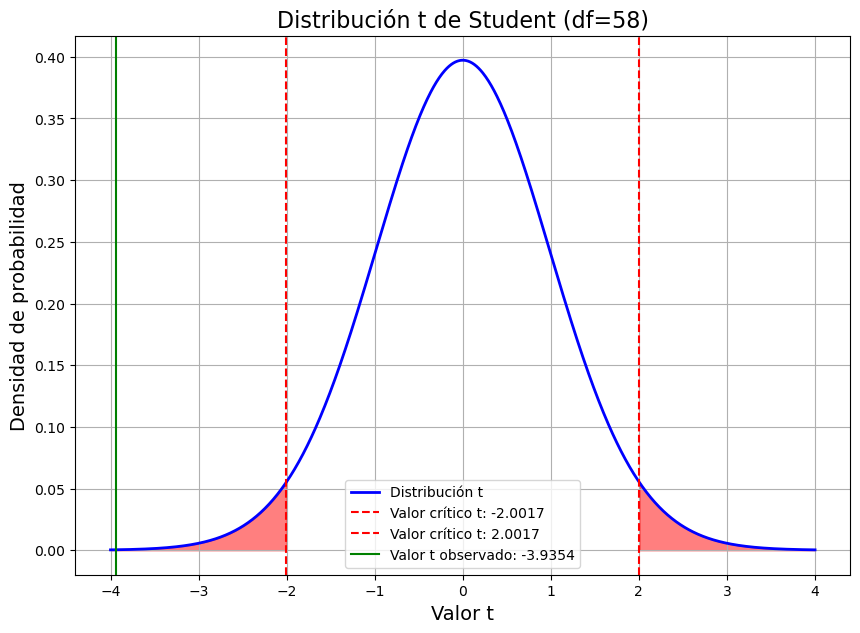

In [9]:
# Vamos a visualizar el gráfico

# Crear un rango de valores t para graficar
t_values = np.linspace(-4, 4, 1000)

# Calcular la función de densidad de probabilidad de la distribución t
pdf_values = stats.t.pdf(t_values, df)

# Tamaño de la gráfica
plt.figure(figsize=(10, 7))

# Graficar la distribución t
plt.plot(t_values, pdf_values, label='Distribución t', color='b', lw=2)

# Sombrear las colas de rechazo
plt.fill_between(t_values, pdf_values, where=(t_values <= -t_critical), color='r', alpha=0.5)
plt.fill_between(t_values, pdf_values, where=(t_values >= t_critical), color='r', alpha=0.5)

# Marcar los valores críticos en la gráfica
plt.axvline(x=-t_critical, color='r', linestyle='--', label=f'Valor crítico t: {-t_critical:.4f}')
plt.axvline(x=t_critical, color='r', linestyle='--', label=f'Valor crítico t: {t_critical:.4f}')

# Marcar el valor t observado
plt.axvline(x=t_stat, color='g', linestyle='-', label=f'Valor t observado: {t_stat:.4f}')

# Etiquetas y título
plt.title(f"Distribución t de Student (df={df})", fontsize=16)
plt.xlabel("Valor t", fontsize=14)
plt.ylabel("Densidad de probabilidad", fontsize=14)

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

Teniendo toda esta información que con un nivel de confianza de 95% se rechaza la HO, es decir, podemos considerar estadísticamente que las medias poblacionales son diferentes, podemos definir que la anchura de los cráneos del periodo temprano son diferentes al periodo tardío. 